In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [111]:
V = 1.4e-15
muM = 6.022e17
muM_to_number = muM * V

In [92]:
steady = np.loadtxt("steady.dat").T

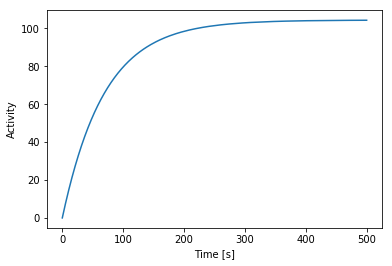

In [112]:
plt.plot(steady[0] / 1000, steady[1]*muM_to_number)
plt.xlabel("Time [s]")
plt.ylabel("Activity")
plt.savefig("steady.png")

In [28]:
step = np.loadtxt("step.dat").T

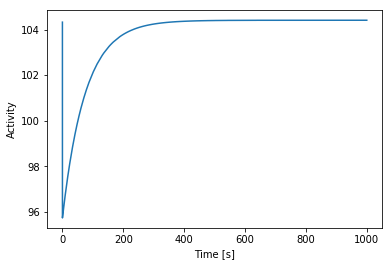

In [113]:
plt.plot(step[0] / 1000, step[1]*muM_to_number);
plt.xlabel("Time [s]")
plt.ylabel("Activity")
plt.savefig("step.eps")

In [30]:
steps = np.loadtxt("steps.dat").T

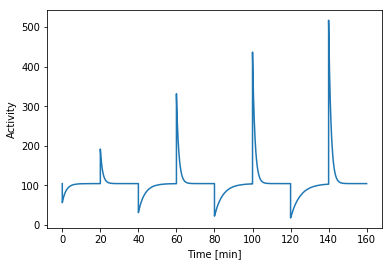

In [114]:
minute = 60 * 1000

plt.plot(steps[0] / minute, steps[1]*muM_to_number);
plt.xlabel("Time [min]")
plt.ylabel("Activity")

#plt.text(0, 0, "+1")
#plt.text(18, 0.25, "-1")
#plt.text(40, 0, "+3")
#plt.text(58, 0.42, "-3")
#plt.text(80, 0, "+5")
#plt.text(98, 0.55, "-5")
#plt.text(122, 0, "+7")
#plt.text(142, 0.6, "-7")

plt.savefig("steps.eps")

In [108]:
gradient = np.loadtxt("gradient.dat").T
gradient2 = np.loadtxt("gradient2.dat").T

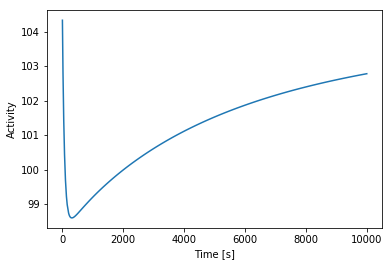

In [115]:
plt.plot(gradient[0] / 1000, gradient[1]*muM_to_number);
plt.xlabel("Time [s]")
plt.ylabel("Activity")
plt.savefig("gradient_1000.eps")

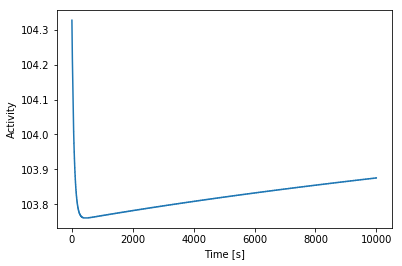

In [116]:
plt.plot(gradient2[0] / 1000, gradient2[1]*muM_to_number);
plt.xlabel("Time [s]")
plt.ylabel("Activity")
plt.savefig("gradient_10000.eps")

In [176]:
pos = np.loadtxt("2D.dat").T

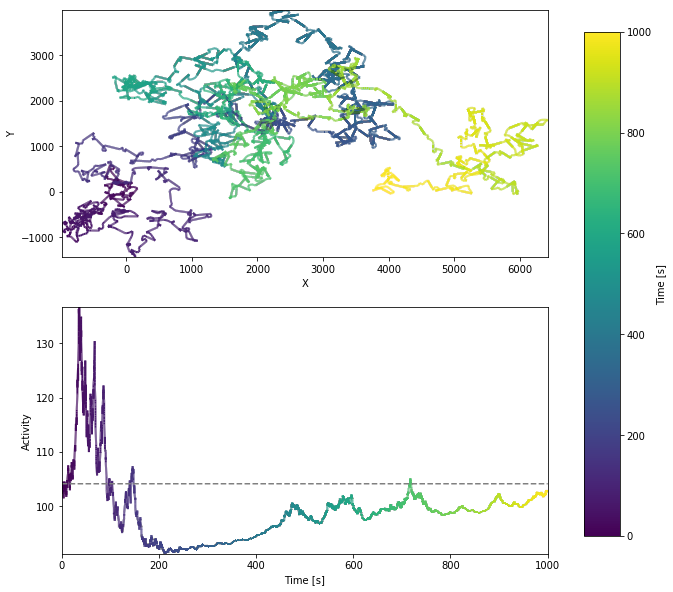

In [177]:
from matplotlib.collections import LineCollection

#plt.xlabel("X")
#plt.ylabel("Y")

points = np.array([pos[31], pos[32]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].set_xlim(pos[31].min(),pos[31].max())
axs[0].set_ylim(pos[32].min(),pos[32].max())
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(pos[0].min(), pos[0].max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(pos[0])
lc.set_linewidth(2)
line = axs[0].add_collection(lc)



points = np.array([pos[0]/1000, pos[1]*muM_to_number]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

axs[1].set_xlim(pos[0].min()/1000,pos[0].max()/1000)
axs[1].set_ylim(pos[1].min()*muM_to_number,pos[1].max()*muM_to_number)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(pos[0].min()/1000, pos[0].max()/1000)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(pos[0]/1000)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
axs[1].plot(pos[0]/1000, np.ones_like(pos[0]) * pos[1][0] * muM_to_number, "--", color="gray")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
colorbar = fig.colorbar(line, cax=cbar_ax)
colorbar.set_label("Time [s]")

axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Activity")

fig.savefig("2D.eps")